In [1]:
import scipy.io 
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from tqdm import tqdm
from numpy import pi
import cv2
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

In [3]:
mat = scipy.io.loadmat('mri_data_files.mat')
fourier_transform1=mat["measurement"]
mask = mat["mask"]

In [4]:
import pywt

In [13]:
help(pywt.idwt)

Help on function idwt in module pywt._dwt:

idwt(cA, cD, wavelet, mode='symmetric', axis=-1)
    idwt(cA, cD, wavelet, mode='symmetric', axis=-1)
    
    Single level Inverse Discrete Wavelet Transform.
    
    Parameters
    ----------
    cA : array_like or None
        Approximation coefficients.  If None, will be set to array of zeros
        with same shape as ``cD``.
    cD : array_like or None
        Detail coefficients.  If None, will be set to array of zeros
        with same shape as ``cA``.
    wavelet : Wavelet object or name
        Wavelet to use
    mode : str, optional (default: 'symmetric')
        Signal extension mode, see :ref:`Modes <ref-modes>`.
    axis: int, optional
        Axis over which to compute the inverse DWT. If not given, the
        last axis is used.
    
    Returns
    -------
    rec: array_like
        Single level reconstruction of signal from given coefficients.
    
    Examples
    --------
    >>> import pywt
    >>> (cA, cD) = pywt.dwt([

In [11]:
# ff2(pywt.idwt(mask, wavelet='db1'))

TypeError: idwt() missing 1 required positional argument: 'cD'

In [ ]:
def mean_squared_error(y_true, y_predicted):
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

In [ ]:
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, stopping_threshold = 1e-6):
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
    for i in range(iterations):
        y_predicted = (current_weight * x) + current_bias
        current_cost = mean_squared_error(y, y_predicted)
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
        previous_cost = current_cost
        costs.append(current_cost)
        weights.append(current_weight)
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
    return current_weight, current_bias

In [10]:
masked= fourier_transform1*mask

In [5]:
img = abs(ifft2(masked))

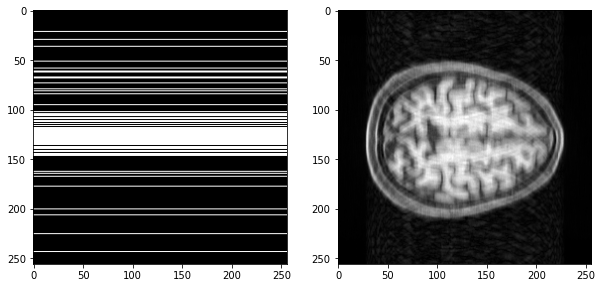

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[1].imshow(img, cmap='gray')
ax[0].imshow(mask, cmap='gray')

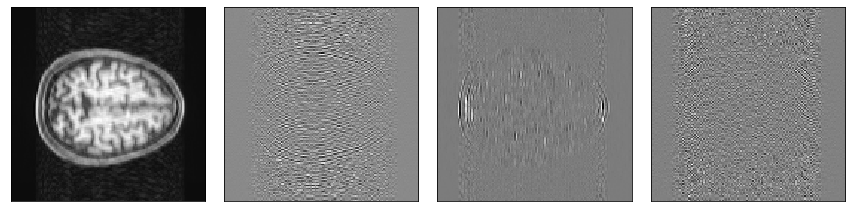

In [7]:
coeffs2 = pywt.dwt2(img, 'db4')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [8]:
print(LL)

[[0.00253936 0.0022191  0.00449364 ... 0.00159595 0.0026754  0.00059961]
 [0.00204662 0.00234796 0.00255314 ... 0.00081634 0.00197637 0.00088952]
 [0.00286335 0.00469381 0.00200248 ... 0.00109525 0.00156223 0.00112009]
 ...
 [0.00302048 0.00240845 0.00304531 ... 0.00243879 0.0018471  0.00074481]
 [0.00257052 0.00201474 0.00210877 ... 0.00123429 0.0018149  0.00068386]
 [0.00198987 0.00420654 0.00284715 ... 0.00254314 0.00261787 0.00104662]]


In [9]:
c=0
for i in range(0,LL.shape[0]-1):
  for j in range(0,LL.shape[1]-1):
    if LL[i][j]==0:
      c=c+1
print(c)

0


In [9]:
mdic = {"image": img}
scipy.io.savemat("final.mat", mdic)